In [1]:
import os
from os.path import isdir, join
from pathlib import Path

#Scientific Library
import numpy as np
import pandas as pd
from sklearn import metrics
import glob
import seaborn as sns
import cv2
from tensorflow.python.data import Dataset

# Visualization Library
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from PIL import Image

%matplotlib inline

In [2]:
ch1 = os.listdir('./input/one/ch1')
ch2 = os.listdir('./input/one/ch2')
ch3 = os.listdir('./input/one/ch3')
ch4 = os.listdir('./input/one/ch4')
ch5 = os.listdir('./input/two/ch1')
ch6 = os.listdir('./input/two/ch2')
ch7 = os.listdir('./input/two/ch3')
ch8 = os.listdir('./input/two/ch4')

In [3]:
print(len(ch1))
print(len(ch2))
print(len(ch3))
print(len(ch4))
print(len(ch5))
print(len(ch6))
print(len(ch7))
print(len(ch8))

1017
1017
1017
1017
1017
1017
1017
1017


In [4]:
print(1017*4)
print(1017*8)

4068
8136


(160, 160, 3)


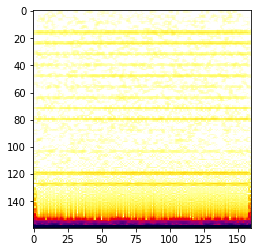

In [5]:
a=plt.imread('./input/one/ch1/' + ch1[0])
print(a.shape)
plt.imshow(a)

In [6]:
ch1_data = np.empty((1017,160,160,3), dtype=np.float32)
ch2_data = np.empty((1017,160,160,3), dtype=np.float32)
ch3_data = np.empty((1017,160,160,3), dtype=np.float32)
ch4_data = np.empty((1017,160,160,3), dtype=np.float32)
ch5_data = np.empty((1017,160,160,3), dtype=np.float32)
ch6_data = np.empty((1017,160,160,3), dtype=np.float32)
ch7_data = np.empty((1017,160,160,3), dtype=np.float32)
ch8_data = np.empty((1017,160,160,3), dtype=np.float32)

index = 0
image_name_list = ch1
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch1/' + image_name)
    ch1_data[index] = imageA
    index+=1
    
index = 0
image_name_list = ch2
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch2/' + image_name)
    ch2_data[index] = imageA
    index+=1

index = 0
image_name_list = ch3
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch3/' + image_name)
    ch3_data[index] = imageA
    index+=1

index = 0
image_name_list = ch4
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch4/' + image_name)
    ch4_data[index] = imageA
    index+=1
    
index = 0
image_name_list = ch5
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch1/' + image_name)
    ch5_data[index] = imageA
    index+=1
    
index = 0
image_name_list = ch6
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch2/' + image_name)
    ch6_data[index] = imageA
    index+=1

index = 0
image_name_list = ch7
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch3/' + image_name)
    ch7_data[index] = imageA
    index+=1

index = 0
image_name_list = ch8
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch4/' + image_name)
    ch8_data[index] = imageA
    index+=1

In [7]:
print(type(ch1_data))
print(ch1_data.shape)
print(type(ch2_data))
print(ch2_data.shape)
print(type(ch3_data))
print(ch3_data.shape)
print(type(ch4_data))
print(ch4_data.shape)
print(type(ch5_data))
print(ch1_data.shape)
print(type(ch6_data))
print(ch2_data.shape)
print(type(ch7_data))
print(ch3_data.shape)
print(type(ch8_data))
print(ch4_data.shape)

<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)


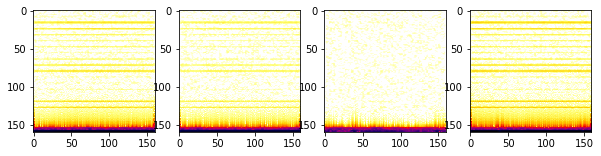

In [8]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,4,1)
plt.imshow(ch1_data[1])
f.add_subplot(1,4,2)
plt.imshow(ch2_data[1])
f.add_subplot(1,4,3)
plt.imshow(ch3_data[1])
f.add_subplot(1,4,4)
plt.imshow(ch4_data[1])

### Here is what I will do for data manipulation
* ch1 and ch2 horizontally -> call it top_ch
* ch3 and ch4 horizontally -> call it bottom_ch
* then, top_ch and bottom_ch vertically with top being on top
* this would be ---- (1, 2)
* same as ---------- (3, 4)

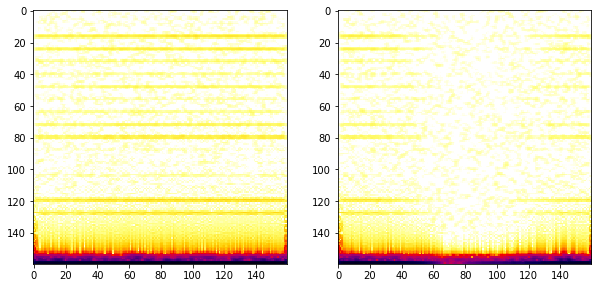

In [9]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(ch1_data[0])
f.add_subplot(1,2,2)
plt.imshow(ch2_data[0])

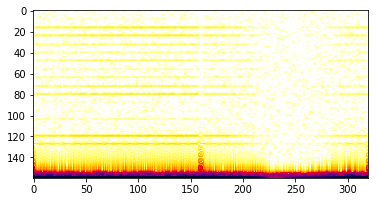

In [10]:
c = np.hstack((ch1_data[0], ch2_data[0]))
plt.imshow(c)

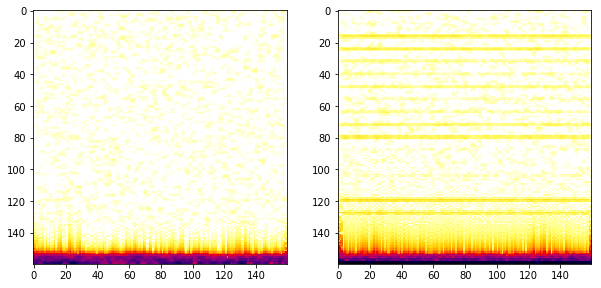

In [11]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(ch3_data[0])
f.add_subplot(1,2,2)
plt.imshow(ch4_data[0])

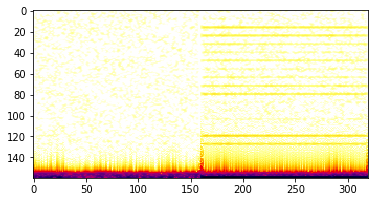

In [12]:
d = np.hstack((ch3_data[0], ch4_data[0]))
plt.imshow(d)

(320, 320, 3)


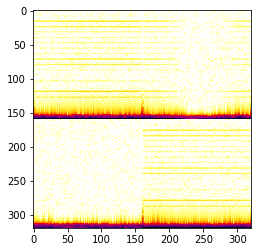

In [13]:
e = np.vstack((c,d))
print(e.shape)
plt.imshow(e)

# Apply on the Whole Traning Set

In [14]:
one_data = np.empty((1017,320,320,3), dtype=np.float32)
two_data = np.empty((1017,320,320,3), dtype=np.float32)
for x in range(0,len(ch1_data)):
    c = np.hstack((ch1_data[x], ch2_data[x]))
    d = np.hstack((ch3_data[x], ch4_data[x]))
    e = np.vstack((c,d))
    one_data[x] = e
    f = np.hstack((ch5_data[x], ch6_data[x]))
    g = np.hstack((ch7_data[x], ch8_data[x]))
    h = np.vstack((f,g))
    two_data[x] = h

In [15]:
print(one_data.shape)
print(two_data.shape)

(1017, 320, 320, 3)
(1017, 320, 320, 3)


In [17]:
p=np.concatenate((one_data, two_data))

MemoryError: 

In [ ]:
p.shape

In [ ]:
data = p
print("min of pixel : " + str(data[0].min()))
print("max of pixel : " + str(data[0].max()))

In [ ]:
#experiment
"""
a = np.empty((1,160,160,3), dtype=np.float32)
b = np.empty((1,160,160,3), dtype=np.float32)
a.fill(1)
b.fill(2)
c = np.hstack((a,b))
print(c.shape)
plt.imshow(c)
"""

# Create Labels

In [ ]:
#unique
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x)
    # print list 
    for x in unique_list: 
        print (x) 

In [ ]:
# create labels
label = np.zeros((1017), dtype=int)
label = np.concatenate((label, np.ones((1017), dtype=int)))
#label = np.concatenate((label, np.repeat(1, 1017)))

print(label.shape)
print(unique(label))
#print(np.where(label==None))

In [ ]:
unique, counts = np.unique(label, return_counts=True)
dict(zip(unique, counts))

# Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, label, test_size = 0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

# Create Test File

In [ ]:
test_train = x_train[:200]
test_label = y_train[:200]

In [ ]:
#x_train[:200].shape
x_train = x_train[200:]
y_train = y_train[200:]

# Model

In [ ]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={'x':x_train},
      y=y_train,
      batch_size=10,
      num_epochs=2,
      shuffle=True)

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':x_val},
    y=y_val,
    shuffle=False,
    num_epochs=2)

In [ ]:
def cnn_model_function(features, labels, mode):
    
    layer_1 = tf.reshape(features['x'], [-1, 320, 320, 3])
    
    layer_2 = tf.layers.conv2d(                          
                inputs=layer_1,
                filters=10,
                kernel_size=[10, 10],
                padding="same",
                activation=tf.nn.relu)
    
    layer_3 = tf.layers.conv2d(
                inputs=layer_2,
                filters=20,
                kernel_size=[5, 5],
                padding="same",
                activation=tf.nn.relu)
    
    layer_4 = tf.reshape(layer_3, [-1, 320 * 320 * 20])
    
    layer_5 = tf.layers.dense(inputs=layer_4, units=10, activation=tf.nn.relu)
    
    layer_6 = tf.layers.dropout(inputs=layer_5, rate=0.4, training=(mode == tf.estimator.ModeKeys.TRAIN))
    
    logits = tf.layers.dense(inputs=layer_6, units=2)
    
    predictions = {
                "classes": tf.argmax(input=logits, axis=1),
                "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    accuracy = tf.metrics.accuracy(labels=labels, predictions=predictions['classes'], name='acc_op')
    tf.summary.scalar('accuracy', accuracy[1])
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer()
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        tf.identity(accuracy[1], name='train_accuracy')
        tf.summary.scalar('train_accuracy', accuracy[1])
        eval_metric_ops = {'train_accuracy':accuracy}
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op, eval_metric_ops=eval_metric_ops)
    
    tf.identity(accuracy[1], name='val_accuracy')
    tf.summary.scalar('val_accuracy', accuracy[1])
    eval_metric_ops = {'val_accuracy':accuracy}
    
    return tf.estimator.EstimatorSpec(
                mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [ ]:
tf.logging.set_verbosity(tf.logging.INFO)

OUTDIR = './a_checkpoints_cnn_subvocal'

cnn_classifier = tf.estimator.Estimator(model_fn=cnn_model_function, model_dir=OUTDIR)

file_writer = tf.summary.FileWriter(OUTDIR)

# Train

In [ ]:
def train_and_evaluate(estimator, epochs=3):
    for i in range(epochs):
        estimator.train(input_fn=train_input_fn, steps=10)
        file_writer = tf.summary.FileWriter(OUTDIR)
        estimator.evaluate(input_fn=eval_input_fn)

train_and_evaluate(cnn_classifier)

# Test

In [ ]:
#get a test_data

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':test_train},
    shuffle=False,
    num_epochs=1)


In [ ]:
generator = cnn_classifier.predict(input_fn=predict_input_fn)

In [ ]:
preds = []
b = []
for i in range(len(test_train)):
    a = next(generator)
    preds.append(a['classes'])
    b.append(i)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, test_label)